C:\Users\thaov\AppData\Local\Temp\ipykernel_16184\1727765620.py:9: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/credit score classification/train.csv")


       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     C

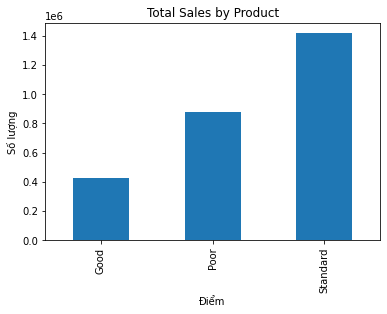

In [15]:
#tải thư viện
import pandas as pd
import matplotlib.pyplot as plt
import os

os.chdir("C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK") #thư mục đang làm việc

#Bước 1: Tải dữ liệu
df = pd.read_csv("C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/credit score classification/train.csv")

#Bước 2: Khai thác dữ liệu
#xem một số dòng
print(df.head())
#kiểm tra dữ liệu lỗi
print(df.isnull().sum())

#xem thống kê dữ liệu
print(df.describe());

#lọc dữ liệu theo một sản phẩm cụ thể
#product_a_data = df[df["Product"] == "Product A"] 

#Bước 3: Trực quan dữ liệu cơ bản
#Tao biểu đồ cho trường dữ liệu product
product_sales = df.groupby("Credit_Score")["Num_Credit_Inquiries"].sum()
product_sales.plot(kind = "bar", title = "Total Sales by Product")
plt.xlabel("Điểm")
plt.ylabel("Số lượng")
plt.show()

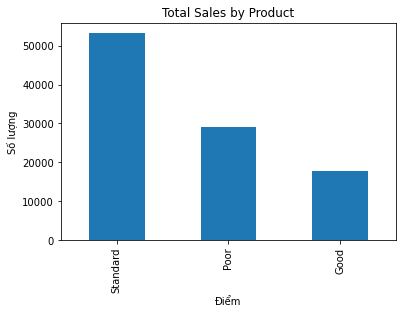

In [16]:
product_sales = df['Credit_Score'].value_counts()
product_sales.plot(kind = "bar", title = "Total Sales by Product")
plt.xlabel("Điểm")
plt.ylabel("Số lượng")
plt.show()